# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [ ]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow
!pip install tabulate

In [ ]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from tabulate import tabulate
from sklearn import preprocessing

## Load Data

In [ ]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [ ]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [ ]:
dirpath = '/content/IIIT-CFW/.'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


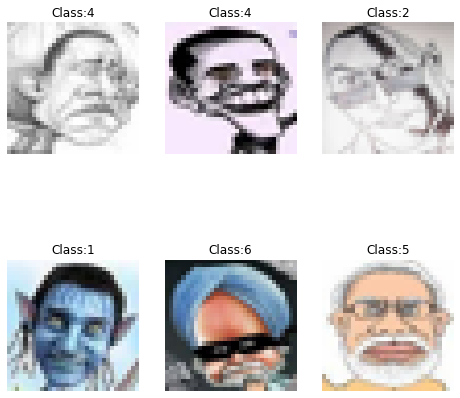

In [ ]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

In [ ]:
print(X[0].shape)
X = X.reshape((X.shape[0],X.shape[1]**2*3))
print(X.shape)

(32, 32, 3)
(672, 3072)


In [ ]:
X_Centered = []
for data in X:
  data = (data - np.min(data))/np.ptp(data)
  X_Centered.append(data)

X_Centered = np.array(X_Centered)
"""Here the data is already between [0,1] so No need for Normalizing i,e X is same sa X_Centered."""

'Here the data is already between [0,1] so No need for Normalizing i,e X is same sa X_Centered.'

Original Images:


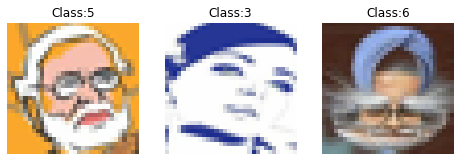

Normalized Images:


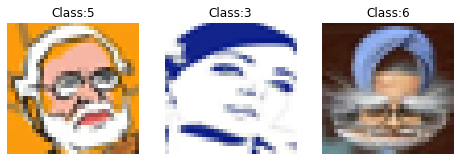

In [ ]:
ind = np.random.randint(0,y.shape[0],3)
print("Original Images:")
display_images(X[ind,...].reshape(3,32,32,3),y[ind], row=1,col=3)
print("Normalized Images:")
display_images(X_Centered[ind,...].reshape(3,32,32,3),y[ind], row=1,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.




#### Write a function that gives eigen values and eigen vectors given data

In [ ]:
"""Function returns the eigen values and eigen vectors In order of decreasing eigen values"""
def eigen_values_fun(X,Y):
  covariance_matrix = np.cov(X,rowvar = False)
  eigen_values,eigen_vectors = np.linalg.eigh(covariance_matrix)
  sorted_order = np.argsort(eigen_values)[::-1]
  return eigen_values[sorted_order],eigen_vectors[:,sorted_order]

#### Compute eigen values and plot eigen value spectrum

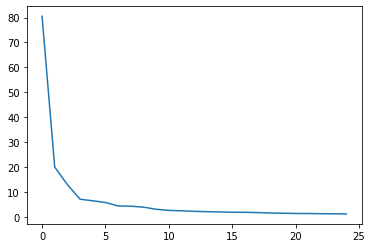

In [ ]:
# eigen values and spectrum
def eigen_spectrum(eigen_values,length):
  """Plots the graph for Highest eigen values"""
  plt.plot(range(0,length),eigen_values[:length])

eigen_values,eigen_vectors = eigen_values_fun(X,y)
eigen_spectrum(eigen_values,25)

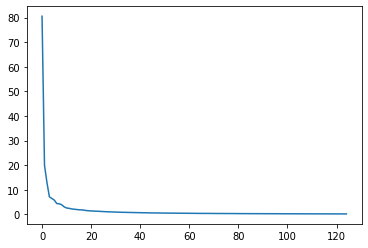

In [115]:
eigen_spectrum(eigen_values,125)

#### Plot the percentage of variances vs the number of principal components

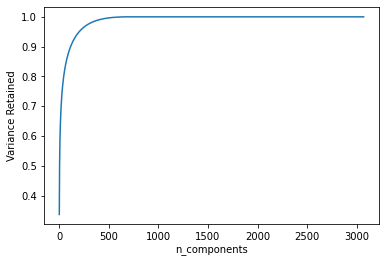

In [116]:
# plot variance vs components
def commulative_variance_fun(eigen_values):
  """Function is for finding Cummlative Variance of the eigen values calculated from the dataset"""
  variances = []
  eigen_sum = np.sum(eigen_values)
  for i in eigen_values:
    variance = i / eigen_sum
    variances.append(variance)
  commulative_variance = []
  var_sum = 0
  for i in variances:
    var_sum = var_sum + i;
    commulative_variance.append(var_sum)
  return variances,commulative_variance

variances,commulative_variance = commulative_variance_fun(eigen_values)
plt.plot(commulative_variance)
plt.xlabel('n_components')
plt.ylabel('Variance Retained')
plt.show()
#plt.plot(range(0,200),commulative_variance[:200]) 

#### Visualize eigen faces(eigen vectors)

In [ ]:
#Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

# indices = [randrange(12)+1 for i in range(5)]
# plot(eigen_vectors,H,W,C, indices)


In [ ]:
def find_n_components(commulative_variance,threashold_value):
  """For Finding the Number of Principle Components for the provided Threashold Variance From commulative variance array"""
  count = 0
  for var in commulative_variance:
    count += 1
    if var  >= threashold_value :
      return count

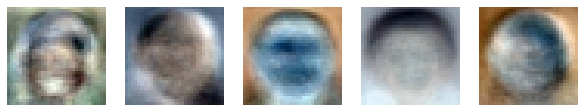

In [ ]:
n_components = find_n_components(commulative_variance,0.90)
eigen_vectors_selected = eigen_vectors[: , 0:n_components]
indices = [randrange(115)+1 for i in range(5)]
plot(eigen_vectors_selected,H,W,C, indices)

After Performing PCA we took 115 components out of 3072(32 x 32 x 3) features with maintaining 90% variance. That means every feature out of 115 are importatnt , It represents the date in 115 dimensions.
-  So, each goast face represents the feature of the images. 
-  we are re-constructing the oringinal image using these 115 eigen vectors, nothing but projecting the data of 3072 dimensionality to 115 dimaensionality.
- each goast face represents the each dimension. Out of 115 we selected randomly 5.  

In [117]:
X_reduced = np.dot(eigen_vectors_selected.transpose(),X.transpose()).transpose()
X_reduced.shape

(672, 115)

#### Reconstruction 

In [141]:
def Image_reconstruction(eigen_vecs,X_reduced):
  """Using the Principle Eigen vectors we are Reconstructing the X_reduced from shape(672,115) to (672,3072) to plot (32,32,3) Image"""  
  reconstruced_images = []
  for i in X_reduced:
    temp = np.matmul(eigen_vecs,i)
    #temp = temp.real
    reconstruced_images.append(temp)
  
  reconstruced_images_normalized = []
  for data in reconstruced_images:
    data = (data - np.min(data))/np.ptp(data)
    reconstruced_images_normalized.append(data)
  
  return np.array(reconstruced_images_normalized)

In [122]:
reconstruced_images = Image_reconstruction(eigen_vectors_selected,X_reduced)

In [131]:
eigen_vectors_selected.shape

(3072, 115)

Original Images:


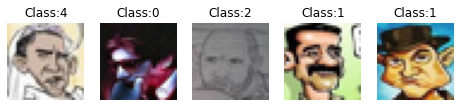

Reconstructed Images with Princple Components:


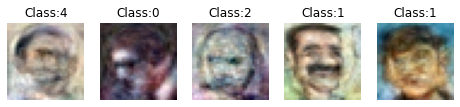

In [123]:
ind = [randrange(len(reconstruced_images))+1 for i in range(5)]
print("Original Images:")
display_images(X[ind,...].reshape(5,32,32,3),y[ind], row=1,col=5)
print("Reconstructed Images with Princple Components:")
display_images(reconstruced_images[ind,...].reshape(5,32,32,3),y[ind], row=1,col=5)

- We Observe that the image clarity has been reduced a little after re-construction using 115 princple eigen vectors.
-  But still we are maintaing the 90 percent variance

####Frobenius norm

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?

In [126]:
test = np.arange(1,7).reshape(2,3)
test, np.linalg.norm(test,ord='fro'),np.sum(test),np.linalg.norm(test.reshape(1,6),ord='fro')

(array([[1, 2, 3],
        [4, 5, 6]]), 9.539392014169456, 21, 9.539392014169456)

In [152]:
def reconstruction_error(X,images_reconstructed):
  """Function for calculation Reconstruction error using the Frobenius Norm"""
  error = 0
  for i in range(len(images_reconstructed)):
    error += np.abs( np.linalg.norm(X[i]) - np.linalg.norm(images_reconstructed[i]) )
  return error

In [163]:
selected_n_components = [25,75,100,125,150,175,250,350,425,500,670,672]
error = []
for n in selected_n_components:
  X_red = np.dot(eigen_vectors[: , 0:n].transpose(),X.transpose()).transpose()
  img_reconstructed = Image_reconstruction(eigen_vectors[: , 0:n],X_red)
  error.append(reconstruction_error(X,img_reconstructed))


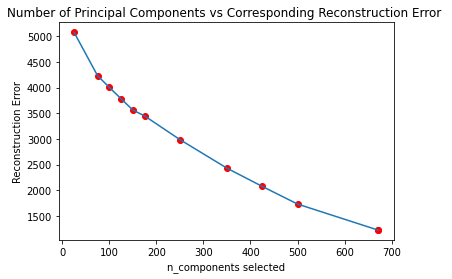

In [168]:
plt.plot(selected_n_components,error,'ro')
plt.plot(selected_n_components,error)
plt.xlabel("n_components selected")
plt.ylabel("Reconstruction Error")
plt.title("Number of Principal Components vs Corresponding Reconstruction Error ")
plt.show()

-   As we Increase the number of components the error is decreasing.

#### Plot data in 2D

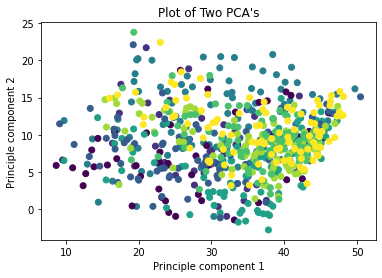

In [169]:
# plot data in 2D
"""Plot for Two Princple Components of the data"""
x_val = X_reduced[:,0]
y_val = X_reduced[:,1]
plt.xlabel("Principle component 1")
plt.ylabel("Principle component 2")
plt.title("Plot of Two PCA's")
plt.scatter(x_val, y_val,c=y)
plt.show()

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [170]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [172]:
X_classwise = {}
y_classwise = {}
for i,image in enumerate(X):
  if y[i] not in y_classwise.keys():
    y_classwise[y[i]] = [i]
    X_classwise[y[i]] = [image]
  else:
    y_classwise[y[i]].append(i)
    X_classwise[y[i]].append(image)

In [174]:
for index,images in X_classwise.items():
  images = np.array(images)
  X_classwise[index] = images.reshape((images.shape[0],images.shape[1]**2*3))

In [175]:
eigen_values_dict = {}
eigen_vectors_dict = {}
cummulative_variance_dict = {}
n_components_dict = {}
for index,images in X_classwise.items():
  evalues, evectors = eigen_values_fun(images,[index for i in range(len(images))])
  eigen_values_dict[index] = evalues
  eigen_vectors_dict[index] = evectors
  var,cvar = commulative_variance_fun(evalues)
  cummulative_variance_dict[index] = cvar
  n_components_dict[index] = find_n_components(cvar,0.90)
print(n_components_dict)

{1: 24, 3: 36, 0: 21, 4: 43, 2: 28, 6: 50, 5: 57, 7: 44}


#### Visualize dominant eigen faces of each of the classes

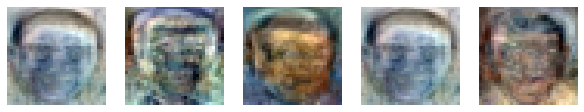

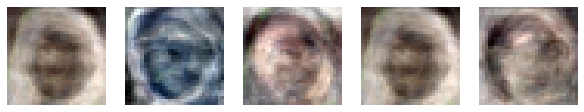

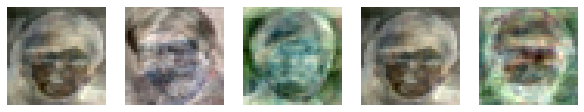

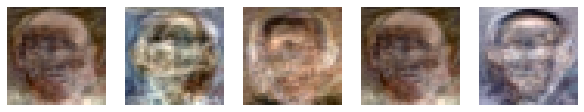

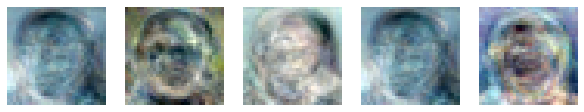

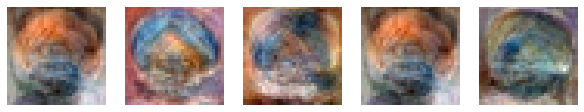

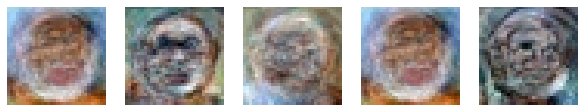

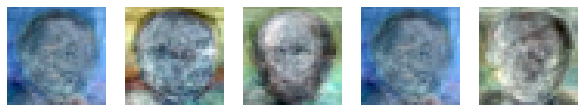

In [177]:
# visualize
eigen_vectors_selected_dict = {}
indices = [randrange(12)+1 for i in range(5)]
for index,count in n_components_dict.items():
  eigen_vectors_selected_dict[index] = eigen_vectors_dict[index][:,0:count]
  plot(eigen_vectors_selected_dict[index],H,W,C, indices)

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [178]:
# components required
table = []
headers = ['Label Name','Number of Principal components For 90% Variance']
for name,label in cfw_dict.items():
  temp = []
  temp.append(name)
  temp.append(n_components_dict[label])
  table.append(temp)
print(tabulate(table, headers, tablefmt="grid"))

+---------------+---------------------------------------------------+
| Label Name    |   Number of Principal components For 90% Variance |
+===============+===================================================+
| Amitabhbachan |                                                21 |
+---------------+---------------------------------------------------+
| AamirKhan     |                                                24 |
+---------------+---------------------------------------------------+
| DwayneJohnson |                                                28 |
+---------------+---------------------------------------------------+
| AishwaryaRai  |                                                36 |
+---------------+---------------------------------------------------+
| BarackObama   |                                                43 |
+---------------+---------------------------------------------------+
| NarendraModi  |                                                57 |
+---------------+---

#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

No, It is not same:
*     For the Entire dataset It is we need 115 principle components for maintaining 90 percent of variance in the data.
But when we do the Principle component analysis for classwise dataset we can observe in the above table that they far more less then 115.
*     It is because when the dataset has more common features there is no need to have two many features, In classwise analysis, common features between data will be more and can maintain the 90 variance we less number of components only.  

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [179]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [180]:
# code here
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X,label) 
linear_regression.score(X,label)

1.0

In [ ]:
regression_score = []
for i in range(1,201):
  pca = PCA(n_components = i)
  X_pca = pca.fit_transform(X)
  linear_regression = LinearRegression().fit(X_pca,label) 
  regression_score.append(linear_regression.score(X_pca,label))


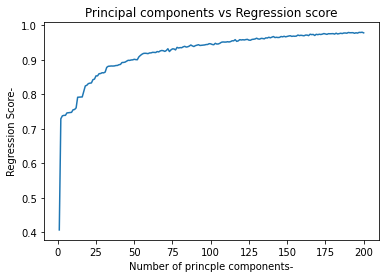

In [184]:
plt.plot([i for i in range(1,201)],regression_score)
plt.xlabel("Number of princple components-")
plt.ylabel("Regression Score-")
plt.title("Principal components vs Regression score")
plt.show()



*   After Principle component count crossed the value 125, the regression score has been saturated and we can see there is no much need for more components then the 125.
*   We can see the impact of dimensionality reduction. 

